In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
df = pd.read_csv("dataset/diabetes-dataset.csv")
df = df.dropna()
df.head(-10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1985,0,131,88,0,0,31.6,0.743,32,1
1986,6,104,74,18,156,29.9,0.722,41,1
1987,3,148,66,25,0,32.5,0.256,22,0
1988,4,120,68,0,0,29.6,0.709,34,0


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
X = (df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]).to_numpy()
y = (df[["Outcome"]]).to_numpy()
y = y.ravel()
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2000, 8)
y shape:  (2000,)


In [5]:
X_train = X[:1400,:]
X_test = X[1400:,:]

y_train = y[:1400]
y_test = y[1400:]

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1400, 8)
y_train shape:  (1400,)
X_test shape:  (600, 8)
y_test shape:  (600,)


In [6]:
model = LogisticRegression(tol = 0.0 ,max_iter = 10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Total Score with train dataset: ", model.score(X_train, y_train))
print("Total Score with test dataset: ", model.score(X_test, y_test))

Total Score with train dataset:  0.7892857142857143
Total Score with test dataset:  0.7683333333333333


In [7]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

Coeficientes:  [ 1.35413682e-01  3.51631567e-02 -1.22545320e-02  7.33379891e-05
 -1.31626898e-03  9.90258645e-02  9.45475225e-01  1.17139546e-02]
Intercept:  [-8.70293219]


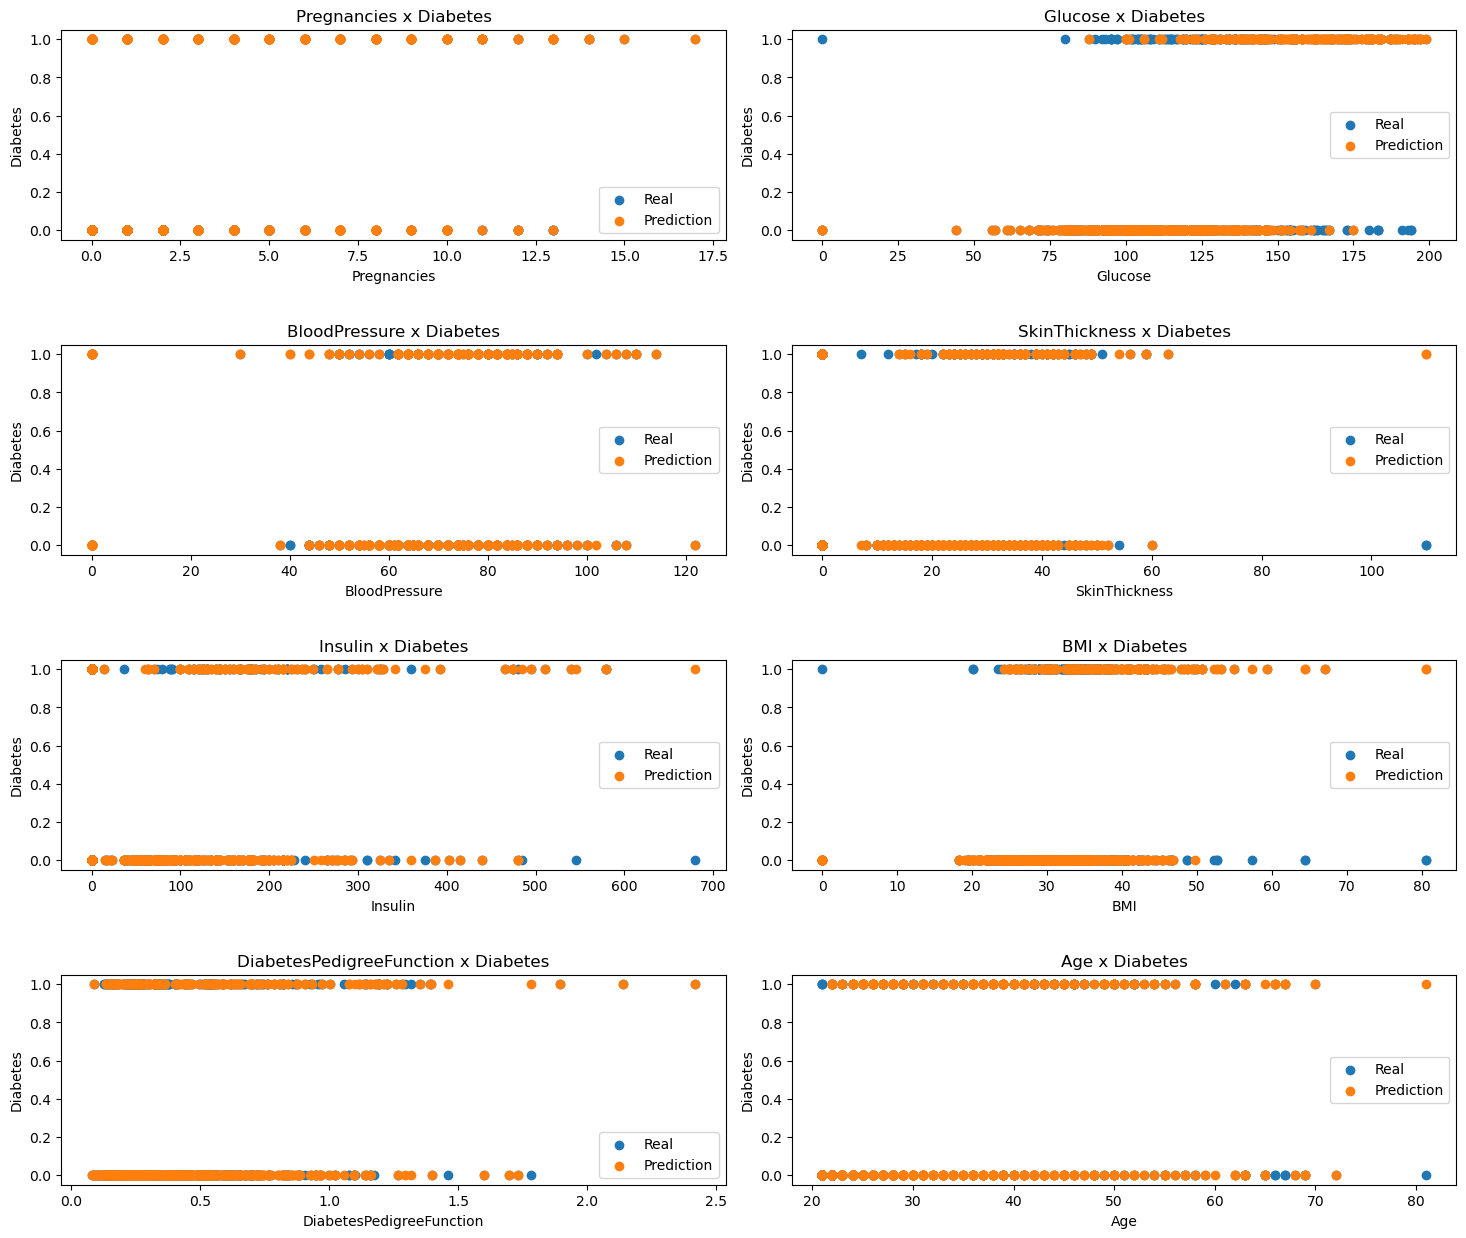

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15))

axs[0, 0].scatter(X_test[:,0],y_test, label = "Real")
axs[0, 0].scatter(X_test[:,0],y_pred, label = "Prediction")
axs[0, 0].set_title('Pregnancies x Diabetes')
axs[0, 0].set_xlabel("Pregnancies")
axs[0, 0].set_ylabel("Diabetes")
axs[0,0].legend()

axs[0, 1].scatter(X_test[:,1],y_test, label = "Real")
axs[0, 1].scatter(X_test[:,1],y_pred, label = "Prediction")
axs[0, 1].set_title('Glucose x Diabetes')
axs[0, 1].set_xlabel("Glucose")
axs[0, 1].set_ylabel("Diabetes")
axs[0,1].legend()

axs[1, 0].scatter(X_test[:,2],y_test, label = "Real")
axs[1, 0].scatter(X_test[:,2],y_pred, label = "Prediction")
axs[1, 0].set_title('BloodPressure x Diabetes')
axs[1, 0].set_xlabel("BloodPressure")
axs[1, 0].set_ylabel("Diabetes")
axs[1,0].legend()

axs[1, 1].scatter(X_test[:,3],y_test, label = "Real")
axs[1, 1].scatter(X_test[:,3],y_pred, label = "Prediction")
axs[1, 1].set_title('SkinThickness x Diabetes')
axs[1, 1].set_xlabel("SkinThickness")
axs[1, 1].set_ylabel("Diabetes")
axs[1,1].legend()

axs[2, 0].scatter(X_test[:,4],y_test, label = "Real")
axs[2, 0].scatter(X_test[:,4],y_pred, label = "Prediction")
axs[2, 0].set_title('Insulin x Diabetes')
axs[2, 0].set_xlabel("Insulin")
axs[2, 0].set_ylabel("Diabetes")
axs[2,0].legend()

axs[2, 1].scatter(X_test[:,5],y_test, label = "Real")
axs[2, 1].scatter(X_test[:,5],y_pred, label = "Prediction")
axs[2, 1].set_title('BMI x Diabetes')
axs[2, 1].set_xlabel("BMI")
axs[2, 1].set_ylabel("Diabetes")
axs[2,1].legend()

axs[3, 0].scatter(X_test[:,6],y_test, label = "Real")
axs[3, 0].scatter(X_test[:,6],y_pred, label = "Prediction")
axs[3, 0].set_title('DiabetesPedigreeFunction x Diabetes')
axs[3, 0].set_xlabel("DiabetesPedigreeFunction")
axs[3, 0].set_ylabel("Diabetes")
axs[3,0].legend()

axs[3, 1].scatter(X_test[:,7],y_test, label = "Real")
axs[3, 1].scatter(X_test[:,7],y_pred, label = "Prediction")
axs[3, 1].set_title('Age x Diabetes')
axs[3, 1].set_xlabel("Age")
axs[3, 1].set_ylabel("Diabetes")
axs[3,1].legend()

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.5)

In [9]:
err = 0

for i in range(X_test.shape[0]):
    
    if(y_test[i] != y_pred[i]):
        err += 1

err = err / X_test.shape[0]
err = err * 100

print("Porcentagem de erros: %.2f %%" %err) 
    

Porcentagem de erros: 23.17 %
